# Descriptive Statistics Using python

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import norm

In [202]:
# Data acquisition
# making a dataframe df read in panadas csv  
df=pd.read_csv('DS1_C5_S1_Descriptive_Analysis_Practice_Car_Data.csv')
print(df.head(0))
df.shape

Empty DataFrame
Columns: [Sl. No., Make, Model, Variant, Displacement, Cylinders, Valves_Per_Cylinder, Drivetrain, Cylinder_Configuration, Engine_Location, Fuel_System, Fuel_Tank_Capacity_litre, Fuel_Type, Height_mm, Length_mm, Width_mm, Body_Type, Doors, City_Mileage_km_litre, Highway_Mileage_km_litre, ARAI_Certified_Mileage, ARAI_Certified_Mileage_for_CNG, Kerb_Weight, Gears, Ground_Clearance, Front_Brakes, Rear_Brakes, Front_Suspension, Rear_Suspension, Front_Track, Rear_Track, Front_Tyre_&_Rim, Rear_Tyre_&_Rim, Power_Steering, Power_Windows, Power_Seats, Keyless_Entry, Power, Torque, Odometer, Speedometer, Tachometer, Tripmeter, Seating_Capacity, Seats_Material, Type, Wheelbase, Wheels_Size, Start_/_Stop_Button, 12v_Power_Outlet, Audiosystem, Aux-in_Compatibility, Average_Fuel_Consumption, Basic_Warranty, Bluetooth, Boot-lid_Opener, Boot_Space_litre, CD_/_MP3_/_DVD_Player, Central_Locking, Child_Safety_Locks, Clock, Cup_Holders, Distance_to_Empty, Door_Pockets, Engine_Malfunction_L

(1276, 139)

In [203]:
df.isnull().sum()

Sl. No.                0
Make                  75
Model                  0
Variant                0
Displacement          12
                    ... 
USB_Ports           1247
Heads-Up_Display    1225
Welcome_Lights      1207
Battery             1263
Electric_Range      1259
Length: 139, dtype: int64

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 139 entries, Sl. No. to Electric_Range
dtypes: float64(15), int64(1), object(123)
memory usage: 1.4+ MB


In [205]:
df.dropna(subset=['Make'],axis=0,inplace=True)
df.shape

(1201, 139)

In [206]:
print(df['Make'].isnull().sum())
df.info('Make')

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1275
Data columns (total 139 columns):
 #    Column                                     Dtype  
---   ------                                     -----  
 0    Sl. No.                                    int64  
 1    Make                                       object 
 2    Model                                      object 
 3    Variant                                    object 
 4    Displacement                               float64
 5    Cylinders                                  float64
 6    Valves_Per_Cylinder                        float64
 7    Drivetrain                                 object 
 8    Cylinder_Configuration                     object 
 9    Engine_Location                            object 
 10   Fuel_System                                object 
 11   Fuel_Tank_Capacity_litre                   float64
 12   Fuel_Type                                  object 
 13   Height_mm                    

In [207]:
print('Displacement',df['Displacement'].isnull().sum())
print('Fuel_Tank_Capacity_litre',df['Fuel_Tank_Capacity_litre'].isnull().sum())
print('City_Mileage_km_litre',df['City_Mileage_km_litre'].isnull().sum())
print('Highway_Mileage_km_litre',df['Highway_Mileage_km_litre'].isnull().sum())
print('Minimum_Turning_Radius',df['Minimum_Turning_Radius'].isnull().sum())

Displacement 11
Fuel_Tank_Capacity_litre 67
City_Mileage_km_litre 530
Highway_Mileage_km_litre 769
Minimum_Turning_Radius 358


In [208]:
a=df['Displacement'].mean()
a

1787.4243697478992

In [209]:
df['Displacement']=df['Displacement'].fillna(a)

In [210]:
a1=df['Fuel_Tank_Capacity_litre'].value_counts()
print(a1.head(5))
a1.index[0]

45.0    125
35.0    115
60.0     90
50.0     84
37.0     79
Name: Fuel_Tank_Capacity_litre, dtype: int64


45.0

In [211]:
df['Fuel_Tank_Capacity_litre']=df['Fuel_Tank_Capacity_litre'].fillna(a1.index[0])

In [212]:
a2=df['City_Mileage_km_litre'].mean()
a2

16.241445603576743

In [213]:
df['City_Mileage_km_litre']=df['City_Mileage_km_litre'].fillna(a2)

In [214]:
a3=df['Highway_Mileage_km_litre'].mean()
a3

17.20462962962965

In [215]:
df['Highway_Mileage_km_litre']=df['Highway_Mileage_km_litre'].fillna(a3)

In [216]:
a4=df['Minimum_Turning_Radius'].mean()
a4

5.498078291814951

In [217]:
df['Minimum_Turning_Radius']=df['Minimum_Turning_Radius'].fillna(a4)

In [218]:
print('Displacement',df['Displacement'].isnull().sum())
print('Fuel_Tank_Capacity_litre',df['Fuel_Tank_Capacity_litre'].isnull().sum())
print('City_Mileage_km_litre',df['City_Mileage_km_litre'].isnull().sum())
print('Highway_Mileage_km_litre',df['Highway_Mileage_km_litre'].isnull().sum())
print('Minimum_Turning_Radius',df['Minimum_Turning_Radius'].isnull().sum())

Displacement 0
Fuel_Tank_Capacity_litre 0
City_Mileage_km_litre 0
Highway_Mileage_km_litre 0
Minimum_Turning_Radius 0


In [219]:
df=df.sort_values(['Make'],ascending=True)
df

,Sl. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
347,347,Aston Martin,Db 11,V12,5198.0,12.0,4.0,AWD (All Wheel Drive),V,"Rear, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1057,1057,Aston Martin,Rapide,Luxe,5935.0,12.0,4.0,RWD (Rear Wheel Drive),V,"Mid, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1056,1056,Aston Martin,Vantage,Coupe,3982.0,8.0,4.0,RWD (Rear Wheel Drive),V,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
264,264,Audi,Q3,35 Tdi Quattro Premium Plus,1968.0,4.0,4.0,AWD (All Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
817,817,Audi,Q7,40 Tfsi Quattro Black Styling,1984.0,6.0,4.0,AWD (All Wheel Drive),In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,11.68 km/full charge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1045,Volvo,V90 Cross Country,D5 Inscription,1969.0,4.0,4.0,AWD (All Wheel Drive),In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1027,1027,Volvo,V40 Cross Country,D3,1984.0,5.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
269,269,Volvo,Xc40,D4 Momentum,1969.0,5.0,4.0,AWD (All Wheel Drive),In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
779,779,Volvo,S60,Polestar,1969.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN


In [220]:
df1=df[['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']]
df1


,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Minimum_Turning_Radius
347,5198.0,80.0,6.000000,17.20463,11.800000
1057,5935.0,90.5,9.100000,12.90000,5.498078
1056,3982.0,73.0,5.000000,8.00000,5.498078
264,1968.0,64.0,12.000000,17.20463,5.900000
817,1984.0,75.0,16.241446,17.20463,6.100000
...,...,...,...,...,...
1045,1969.0,60.0,13.200000,17.20463,5.498078
1027,1984.0,60.0,13.050000,16.80000,5.450000
269,1969.0,45.0,16.241446,17.20463,5.498078
779,1969.0,67.0,13.200000,18.50000,5.650000


In [221]:
Mean=[]
Median=[]
Mode=[]
SD=[]
CV=[]

In [222]:
for y in df1:
    M=df1.loc[:,y].mean()
    Mean.append(M)
    Median.append(df1.loc[:,y].median())
    Mode.append(st.mode(df1[y]))
    S=df1.loc[:,y].std()
    SD.append(S)
    CV.append(S/M*100)

In [223]:
row_head=[Mean,Median,Mode,SD,CV]
row=['Mean','Median','Mode','StandardDeviation','CoefficientVariance']
col_head=['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']

In [224]:
d=pd.DataFrame(row_head,columns=col_head)
d.insert(0,'Measures',row,True)
d

,Measures,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Minimum_Turning_Radius
0,Mean,1787.424370,50.651041,16.241446,17.204630,5.498078
1,Median,1497.000000,45.000000,16.241446,17.204630,5.400000
2,Mode,1197.000000,45.000000,16.241446,17.204630,5.498078
3,StandardDeviation,959.487407,15.197321,6.782795,2.936264,1.127798
4,CoefficientVariance,53.679888,30.003965,41.762264,17.066710,20.512587


In [225]:
df2=df[['Make','Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']].groupby(by=['Make'])
df2

In [226]:
d1=df['Make'].drop_duplicates().values
print(d1)
print(len(d1))

['Aston Martin' 'Audi' 'Bajaj' 'Bentley' 'Bmw' 'Bugatti' 'Datsun' 'Dc'
 'Ferrari' 'Fiat' 'Force' 'Ford' 'Honda' 'Hyundai' 'Icml' 'Isuzu' 'Jaguar'
 'Jeep' 'Kia' 'Lamborghini' 'Land Rover' 'Land Rover Rover' 'Lexus'
 'Mahindra' 'Maruti Suzuki' 'Maruti Suzuki R' 'Maserati' 'Mg' 'Mini'
 'Mitsubishi' 'Nissan' 'Porsche' 'Premier' 'Renault' 'Skoda' 'Tata'
 'Toyota' 'Volkswagen' 'Volvo']
39


In [227]:

for i in d1:
    d2=df2.get_group(i)
    d2=d2.drop(['Make'],axis=1)
    Mean=[]
    Median=[]
    Mode=[]
    SD=[]
    CV=[]
    for y in d2:
        M=d2.loc[:,y].mean()
        Mean.append(M)
        Median.append(d2.loc[:,y].median())
        Mode.append(st.mode(d2[y]))
        S=d2.loc[:,y].std()
        SD.append(S)
        CV.append(S/M*100)
    row_head=[Mean,Median,Mode,SD,CV]
    col_head=['Displacement','Fuel_Tank_Capacity_litre','City_Mileage_km_litre','Highway_Mileage_km_litre','Minimum_Turning_Radius']
    d=pd.DataFrame(row_head,columns=col_head)
    row=['Mean','Median','Mode','StandardDeviation','CoefficientVariance']  
    print('Manufacturer:',i)
    d.insert(0,'Measures',row,True)
    print(d)
    




Manufacturer: Aston Martin
              Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                 Mean   5038.333333                 81.166667   
1               Median   5198.000000                 80.000000   
2                 Mode   5198.000000                 80.000000   
3    StandardDeviation    986.241519                  8.808140   
4  CoefficientVariance     19.574757                 10.851918   

   City_Mileage_km_litre  Highway_Mileage_km_litre  Minimum_Turning_Radius  
0               6.700000                 12.701543                7.598719  
1               6.000000                 12.900000                5.498078  
2               6.000000                 17.204630                5.498078  
3               2.137756                  4.605523                3.638416  
4              31.906803                 36.259553               47.881969  
Manufacturer: Audi
              Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                 Mean   2256

4              39.214155                 17.288452               33.801219  
Manufacturer: Jeep
              Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                 Mean   2102.357143                 65.678571   
1               Median   1956.000000                 60.000000   
2                 Mode   1956.000000                 60.000000   
3    StandardDeviation    991.904872                 12.488672   
4  CoefficientVariance     47.180608                 19.014835   

   City_Mileage_km_litre  Highway_Mileage_km_litre  Minimum_Turning_Radius  
0              15.917668                 16.890179            5.498078e+00  
1              16.241446                 17.204630            5.498078e+00  
2              16.241446                 17.204630            5.498078e+00  
3               1.125122                  1.663919            1.808953e-15  
4               7.068386                  9.851397            3.290156e-14  
Manufacturer: Kia
              Measures  Dis

4              20.147035                 14.604099               16.847507  
Manufacturer: Toyota
              Measures  Displacement  Fuel_Tank_Capacity_litre  \
0                 Mean   1803.292683                 50.512195   
1               Median   1496.000000                 45.000000   
2                 Mode   1364.000000                 45.000000   
3    StandardDeviation    641.799947                 12.489249   
4  CoefficientVariance     35.590448                 24.725215   

   City_Mileage_km_litre  Highway_Mileage_km_litre  Minimum_Turning_Radius  
0              14.768279                 17.811518                5.150000  
1              15.100000                 17.204630                5.100000  
2              16.241446                 17.204630                4.800000  
3               3.568185                  3.177429                0.336742  
4              24.161140                 17.839181                6.538676  
Manufacturer: Volkswagen
              Meas

In [228]:
d

,Measures,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Minimum_Turning_Radius
0,Mean,1975.555556,60.583333,13.866513,17.364455,6.179595
1,Median,1969.000000,63.500000,13.200000,17.204630,5.498078
2,Mode,1969.000000,68.000000,13.200000,17.204630,5.498078
3,StandardDeviation,138.270078,9.006942,2.910284,0.735785,1.692444
4,CoefficientVariance,6.999048,14.867029,20.987855,4.237308,27.387627


In [229]:
df3=df[['Make','Displacement']]
df3

,Make,Displacement
347,Aston Martin,5198.0
1057,Aston Martin,5935.0
1056,Aston Martin,3982.0
264,Audi,1968.0
817,Audi,1984.0
...,...,...
1045,Volvo,1969.0
1027,Volvo,1984.0
269,Volvo,1969.0
779,Volvo,1969.0


In [230]:
a5=df3[df3.Make=='Maruti Suzuki']
a5=a5.sort_values(by='Displacement')
print('Maruti Suzuki:\n',a5)
print('Minimum:',a5['Displacement'].min())
print('Maximum:',a5['Displacement'].max())
print('Range',(a5['Displacement'].max()-a5['Displacement'].min()))
ms_mean=a5['Displacement'].mean()
print('Mean:',ms_mean)
print('Median:',a5['Displacement'].median())
print('Mode:',st.mode(a5['Displacement']))
mn_standarddev=st.stdev(a5['Displacement'])
print('Standard',mn_standarddev)
print('Q0:',a5['Displacement'].quantile(0))
print('Q1:',a5['Displacement'].quantile(0.25))
print('Q2:',a5['Displacement'].quantile(0.5))
print('Q3:',a5['Displacement'].quantile(0.75))
print('Q4:',a5['Displacement'].quantile(1))
Q3=a5['Displacement'].quantile(0.75)
Q1=a5['Displacement'].quantile(0.25)
print('IQR:',Q3-Q1)
uf=(Q3+(1.5*(Q3-Q1)))
lf=(Q1-(1.5*(Q3-Q1)))
print('Upper fence:',uf)
print('Lower fence:',lf)
uo=[]
lo=[]
for x in a5['Displacement']:
    if x<lf:
        lo.append(x)
    if x>uf:
        uo.append(x)
print('Outliers:',lo+uo)

Maruti Suzuki:
                Make  Displacement
1059  Maruti Suzuki         796.0
1060  Maruti Suzuki         796.0
361   Maruti Suzuki         796.0
362   Maruti Suzuki         796.0
363   Maruti Suzuki         796.0
...             ...           ...
935   Maruti Suzuki        1498.0
936   Maruti Suzuki        1498.0
1100  Maruti Suzuki        1498.0
1102  Maruti Suzuki        1498.0
1101  Maruti Suzuki        1498.0

[149 rows x 2 columns]
Minimum: 796.0
Maximum: 1498.0
Range 702.0
Mean: 1171.731543624161
Median: 1197.0
Mode: 998.0
Standard 188.5401466629381
Q0: 796.0
Q1: 998.0
Q2: 1197.0
Q3: 1248.0
Q4: 1498.0
IQR: 250.0
Upper fence: 1623.0
Lower fence: 623.0
Outliers: []


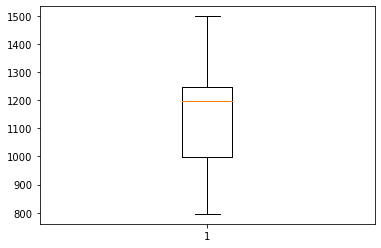

In [231]:
plt.boxplot(a5['Displacement'])
plt.title=('Maruti Suzuki')
plt.show()

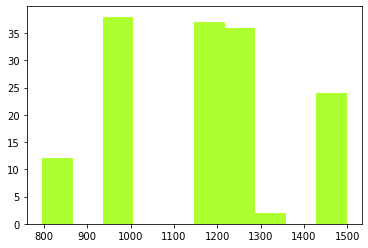

In [232]:
plt.hist(a5['Displacement'],color='greenyellow')
plt.show()

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


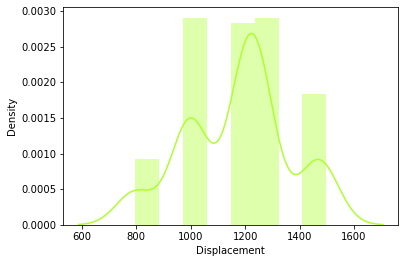

In [233]:
sns.distplot(a5['Displacement'],color='greenyellow')
plt.show()

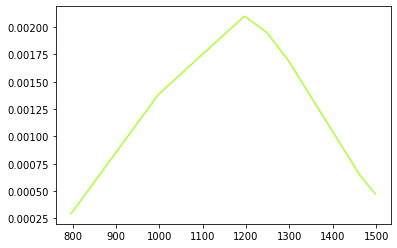

In [234]:
plt.plot(a5['Displacement'],norm.pdf(a5['Displacement'],ms_mean,mn_standarddev),color='greenyellow',label='Maruti Suzuki')
plt.show()

In [235]:
a6=df3[df3.Make=='Toyota']
a6=a6.sort_values('Displacement')
print('Toyota:\n',a6)
print('Minimum:',a6['Displacement'].min())
print('Maximum:',a6['Displacement'].max())
print('Range',(a6['Displacement'].max()-a6['Displacement'].min()))
t_mean=a6['Displacement'].mean()
print('Mean:',t_mean)
print('Median:',a6['Displacement'].median())
print('Mode:',st.mode(a6['Displacement']))
t_standarddev=st.stdev(a6['Displacement'])
print('Standard',t_standarddev)
print('Q0:',a6['Displacement'].quantile(0))
print('Q1:',a6['Displacement'].quantile(0.25))
print('Q2:',a6['Displacement'].quantile(0.5))
print('Q3:',a6['Displacement'].quantile(0.75))
print('Q4:',a6['Displacement'].quantile(1))
Q3=a6['Displacement'].quantile(0.75)
Q1=a6['Displacement'].quantile(0.25)
IQR=Q3-Q1
print('IQR:',IQR)
uf=Q3+(1.5*IQR)
lf=Q1-(1.5*IQR)
print('Upper fence:',uf)
print('Lower fence:',lf)
uo=[]
lo=[]
for x in a6['Displacement']:
    if x<lf:
        lo.append(x)
    if x>uf:
        uo.append(x)
print('Outliers:',lo+uo)

Toyota:
        Make  Displacement
221  Toyota        1197.0
95   Toyota        1197.0
90   Toyota        1197.0
88   Toyota        1197.0
87   Toyota        1197.0
..      ...           ...
761  Toyota        2755.0
707  Toyota        2755.0
706  Toyota        2755.0
312  Toyota        2982.0
846  Toyota        4461.0

[82 rows x 2 columns]
Minimum: 1197.0
Maximum: 4461.0
Range 3264.0
Mean: 1803.2926829268292
Median: 1496.0
Mode: 1364.0
Standard 641.799947443432
Q0: 1197.0
Q1: 1364.0
Q2: 1496.0
Q3: 2393.0
Q4: 4461.0
IQR: 1029.0
Upper fence: 3936.5
Lower fence: -179.5
Outliers: [4461.0]


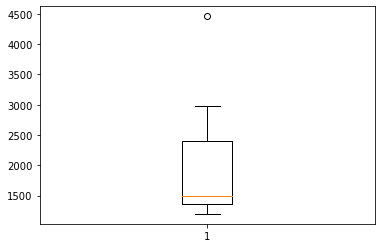

In [236]:
plt.boxplot(a6['Displacement'])
plt.title=('Toyota')
plt.show()

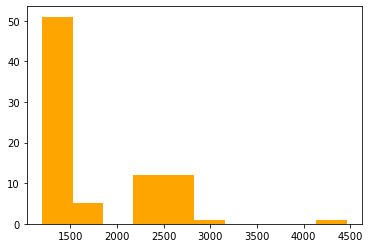

In [237]:
plt.hist(a6['Displacement'],color='orange')
plt.show()

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


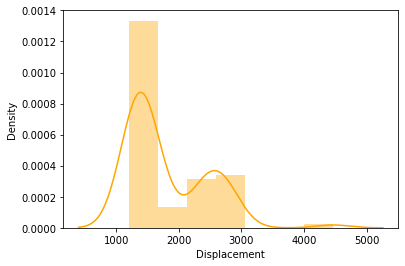

In [238]:
sns.distplot(a6['Displacement'],color='orange')
plt.show()

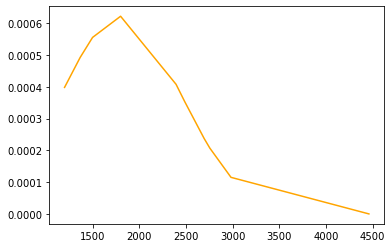

In [239]:
plt.plot(a6['Displacement'],norm.pdf(a6['Displacement'],t_mean,t_standarddev),color='orange',label='Toyota')
plt.show()

In [240]:
a7=df3[df3.Make=='Mahindra']
a7=a7.sort_values('Displacement')
print('Mahindra:\n',a7)
print('Minimum:',a7['Displacement'].min())
print('Maximum:',a7['Displacement'].max())
print('Range',(a7['Displacement'].max()-a7['Displacement'].min()))
m_mean=a7['Displacement'].mean()
print('Mean:',m_mean)
print('Median:',a7['Displacement'].median())
print('Mode:',st.mode(a7['Displacement']))
m_standarddev=st.stdev(a7['Displacement'])
print('Standard',m_standarddev)
print('Q0:',a7['Displacement'].quantile(0))
print('Q1:',a7['Displacement'].quantile(0.25))
print('Q2:',a7['Displacement'].quantile(0.5))
print('Q3:',a7['Displacement'].quantile(0.75))
print('Q4:',a7['Displacement'].quantile(1))
Q3=a7['Displacement'].quantile(0.75)
Q1=a7['Displacement'].quantile(0.25)
IQR=Q3-Q1
print('IQR:',IQR)
uf=Q3+(1.5*IQR)
lf=Q1-(1.5*IQR)
print('Upper fence:',uf)
print('Lower fence:',lf)
uo=[]
lo=[]
for x in a7['Displacement']:
    if x<lf:
        lo.append(x)
    if x>uf:
        uo.append(x)
print('Outliers:',lo+uo)

Mahindra:
           Make  Displacement
687   Mahindra          72.0
688   Mahindra          72.0
689   Mahindra          72.0
586   Mahindra        1197.0
585   Mahindra        1197.0
...        ...           ...
1084  Mahindra        2523.0
1085  Mahindra        2523.0
1086  Mahindra        2523.0
653   Mahindra        2523.0
1088  Mahindra        2523.0

[119 rows x 2 columns]
Minimum: 72.0
Maximum: 2523.0
Range 2451.0
Mean: 1720.7718381470236
Median: 1497.0
Mode: 2179.0
Standard 530.2919742527432
Q0: 72.0
Q1: 1461.0
Q2: 1497.0
Q3: 2179.0
Q4: 2523.0
IQR: 718.0
Upper fence: 3256.0
Lower fence: 384.0
Outliers: [72.0, 72.0, 72.0]


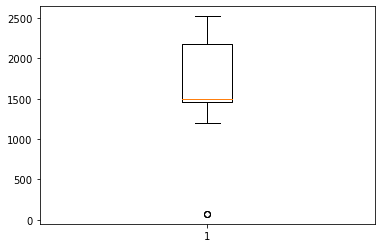

In [241]:
plt.boxplot(a7['Displacement'])
plt.title=('Toyota')
plt.show()

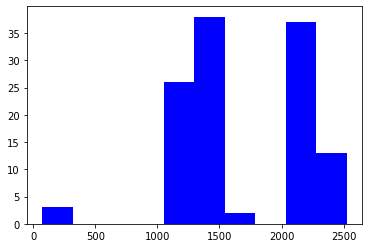

In [242]:
plt.hist(a7['Displacement'],color='blue')
plt.show()

C:\Users\krish\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


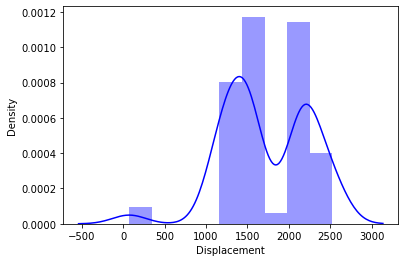

In [243]:
sns.distplot(a7['Displacement'],color='blue')
plt.show()

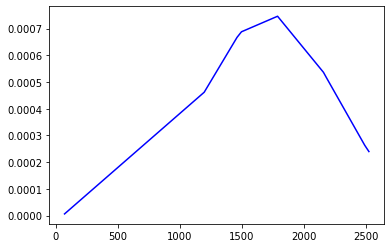

In [244]:
plt.plot(a7['Displacement'],norm.pdf(a7['Displacement'],m_mean,m_standarddev),color='blue',label='Mahindra')
plt.show()

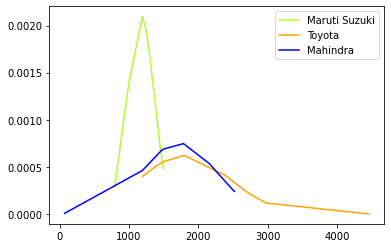

In [245]:
plt.plot(a5['Displacement'],norm.pdf(a5['Displacement'],ms_mean,mn_standarddev),color='greenyellow',label='Maruti Suzuki')
plt.plot(a6['Displacement'],norm.pdf(a6['Displacement'],t_mean,t_standarddev),color='orange',label='Toyota')
plt.plot(a7['Displacement'],norm.pdf(a7['Displacement'],m_mean,m_standarddev),color='blue',label='Mahindra')
plt.legend()
plt.show()

In [246]:
print('Maruti Suzuki Kurtosis:',kurtosis(a5['Displacement']))
print('Toyota Kurtosis:',kurtosis(a6['Displacement']))
print('Mahindra Kurtosis:',kurtosis(a7['Displacement']))

Maruti Suzuki Kurtosis: -0.46288680133638715
Toyota Kurtosis: 1.7853227242725271
Mahindra Kurtosis: 0.3443764324721901


Maruti Suzuki have maximum cars with the high engine displacement

In [247]:
# Task 2
# Make, Displacement, Valves_Per_Cylinder, Fuel_Tank_Capacity_litre, City_Mileage_km_litre,
# Highway_Mileage_km_litre, Kerb_Weight, Torque, Seating_Capacity, Wheels_Size, Average_Fuel_Consumption,
# ABS_(Anti-lock_Braking_System), Gross_Vehicle_Weight

In [248]:
print(df['Valves_Per_Cylinder'].isnull().sum())
e=df['Valves_Per_Cylinder'].value_counts()
print(len(e))
print(e.index[0])
print(df['Valves_Per_Cylinder'])
df['Valves_Per_Cylinder']=df['Valves_Per_Cylinder'].fillna(e.index[0])
print(type(df['Valves_Per_Cylinder']))
print(type(df['City_Mileage_km_litre']))
print(df['Valves_Per_Cylinder'].isnull().sum())

100
7
4.0
347     4.0
1057    4.0
1056    4.0
264     4.0
817     4.0
       ... 
1045    4.0
1027    4.0
269     4.0
779     4.0
759     4.0
Name: Valves_Per_Cylinder, Length: 1201, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
0


In [249]:
df4=df[['Make', 'City_Mileage_km_litre', 'Displacement', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre']]
df4=df4.groupby(['Make'])
df4

In [250]:
df5=df['Make'].drop_duplicates().values
df5

array(['Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti',
       'Datsun', 'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Icml', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land Rover', 'Land Rover Rover', 'Lexus', 'Mahindra',
       'Maruti Suzuki', 'Maruti Suzuki R', 'Maserati', 'Mg', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Premier', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)

In [251]:
df5=df['Make'].unique()
df5

array(['Aston Martin', 'Audi', 'Bajaj', 'Bentley', 'Bmw', 'Bugatti',
       'Datsun', 'Dc', 'Ferrari', 'Fiat', 'Force', 'Ford', 'Honda',
       'Hyundai', 'Icml', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini',
       'Land Rover', 'Land Rover Rover', 'Lexus', 'Mahindra',
       'Maruti Suzuki', 'Maruti Suzuki R', 'Maserati', 'Mg', 'Mini',
       'Mitsubishi', 'Nissan', 'Porsche', 'Premier', 'Renault', 'Skoda',
       'Tata', 'Toyota', 'Volkswagen', 'Volvo'], dtype=object)


 Aston Martin
Mileage Correlation Displacement
R =  0.9097189078565772


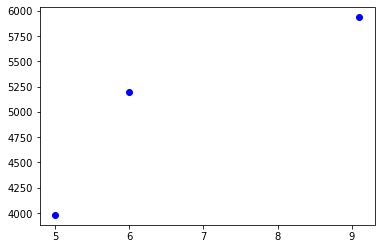

Mileage Correlation Valves_Per_Cylinder
R =  nan


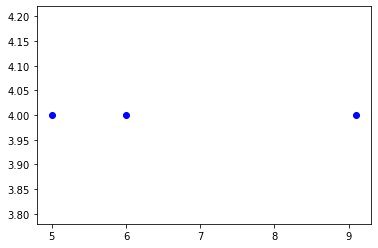

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.9851482641633029


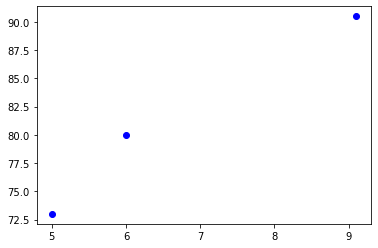

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.9097189078565772, nan, 0.9851482641633029]


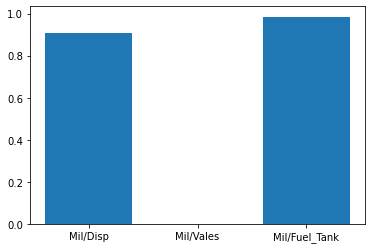


 Audi
Mileage Correlation Displacement
R =  -0.5379546082263214


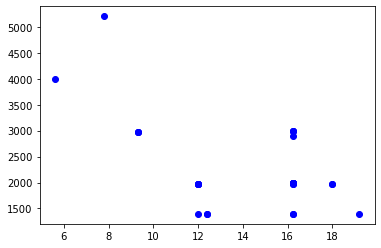

Mileage Correlation Valves_Per_Cylinder
R =  0.17063943512797894


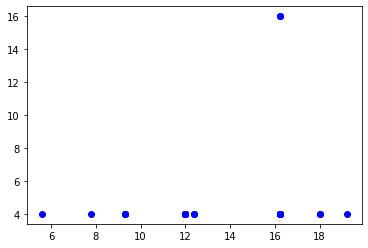

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.3245787257772166


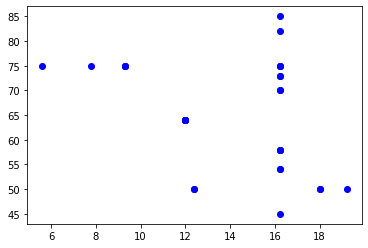

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.5379546082263214, 0.17063943512797894, -0.3245787257772166]


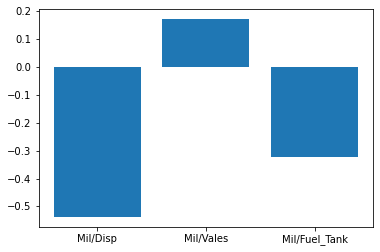


 Bajaj
Mileage Correlation Displacement
R =  nan


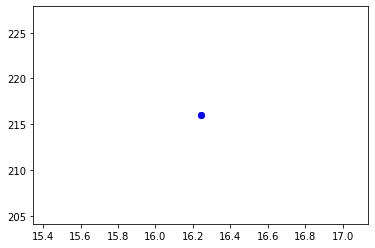

Mileage Correlation Valves_Per_Cylinder
R =  nan


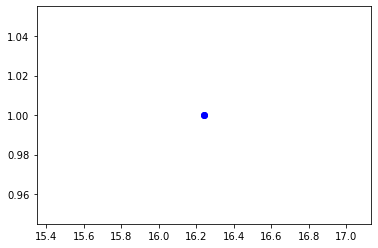

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


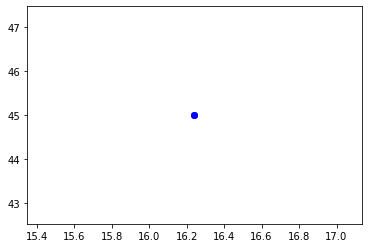

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[nan, nan, nan]


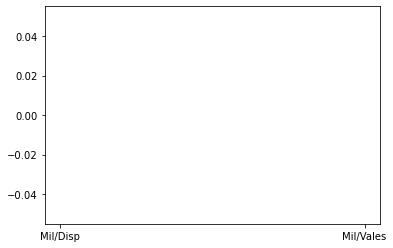


 Bentley
Mileage Correlation Displacement
R =  -0.30440040841915494


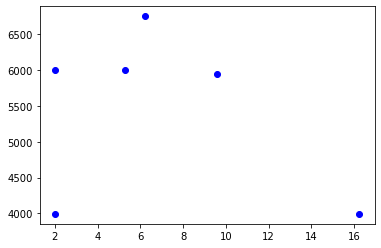

Mileage Correlation Valves_Per_Cylinder
R =  nan


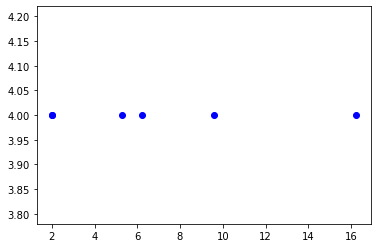

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.8655638224344075


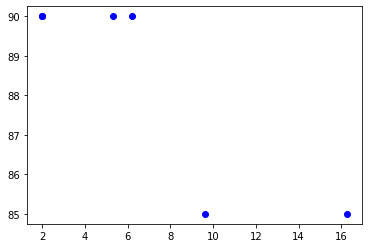

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.30440040841915494, nan, -0.8655638224344075]


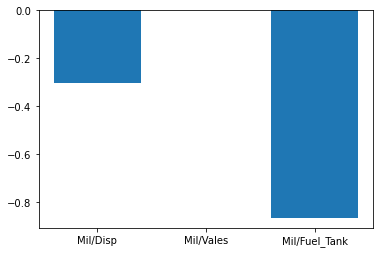


 Bmw
Mileage Correlation Displacement
R =  -0.2420486377977137


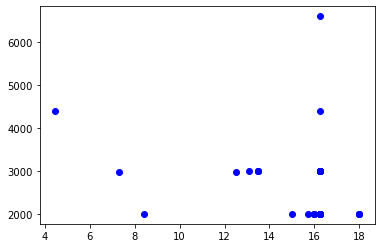

Mileage Correlation Valves_Per_Cylinder
R =  nan


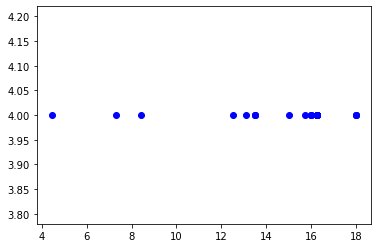

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.19866319545850855


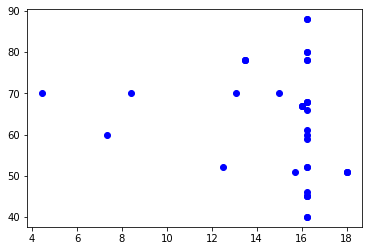

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.2420486377977137, nan, -0.19866319545850855]


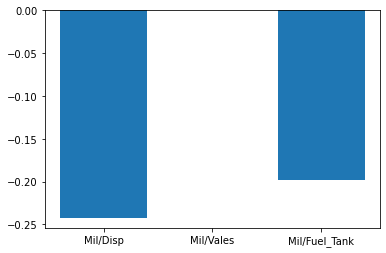


 Bugatti
Mileage Correlation Displacement
R =  nan


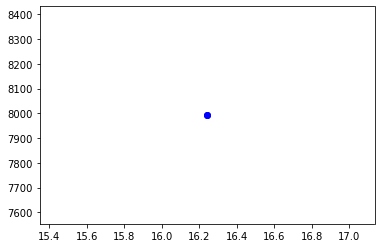

Mileage Correlation Valves_Per_Cylinder
R =  nan


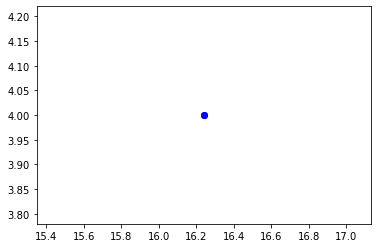

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


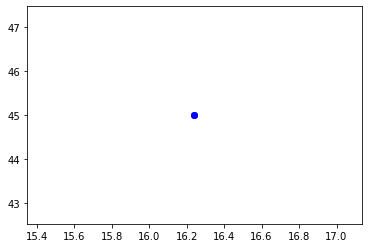

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[nan, nan, nan]


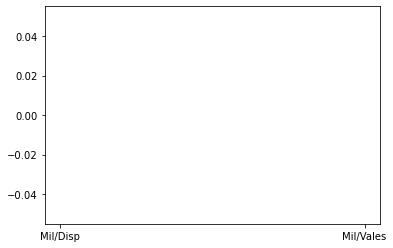


 Datsun
Mileage Correlation Displacement
R =  -0.4253989404913713


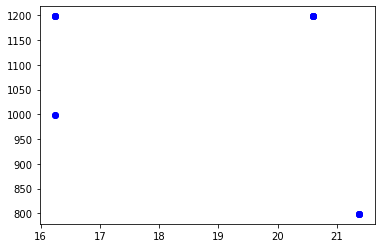

Mileage Correlation Valves_Per_Cylinder
R =  nan


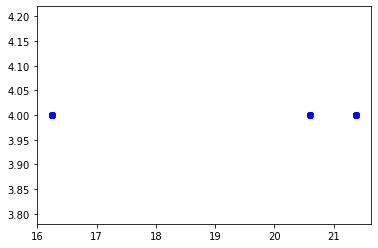

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.21165267530502277


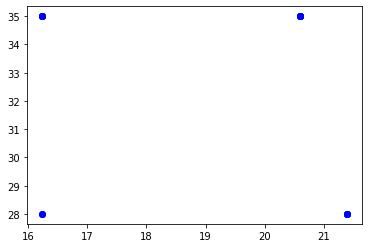

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.4253989404913713, nan, -0.21165267530502277]


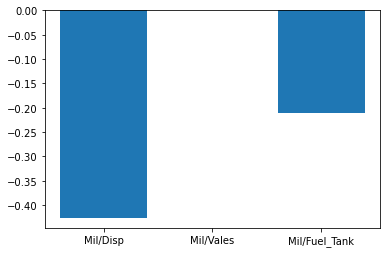


 Dc
Mileage Correlation Displacement
R =  nan


C:\Users\krish\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\krish\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


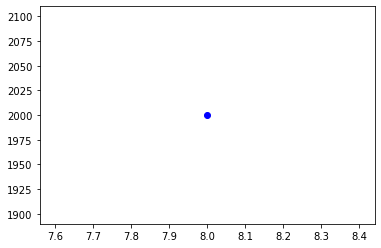

Mileage Correlation Valves_Per_Cylinder
R =  nan


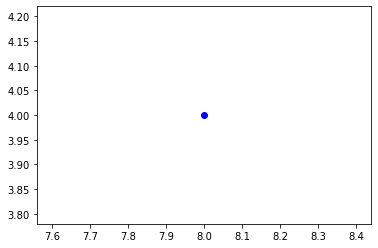

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


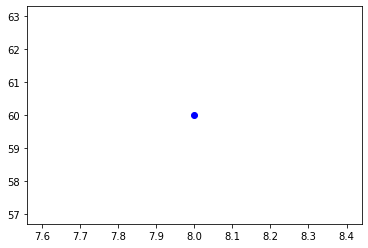

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[nan, nan, nan]


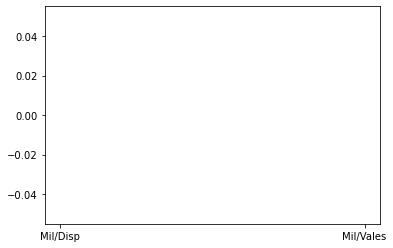


 Ferrari
Mileage Correlation Displacement
R =  0.7148203816236754


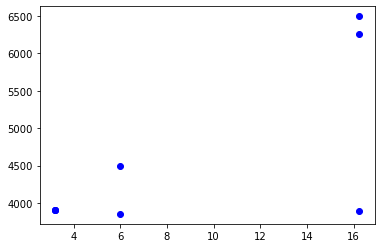

Mileage Correlation Valves_Per_Cylinder
R =  nan


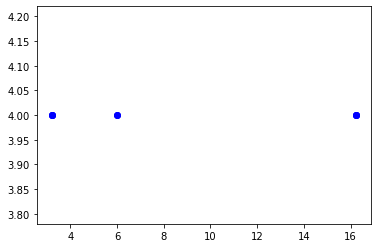

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.7374464028686961


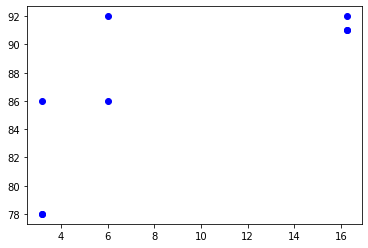

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.7148203816236754, nan, 0.7374464028686961]


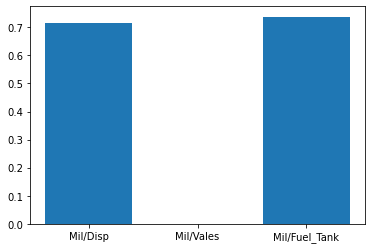


 Fiat
Mileage Correlation Displacement
R =  -0.2792546652480345


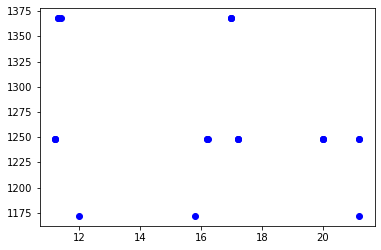

Mileage Correlation Valves_Per_Cylinder
R =  nan


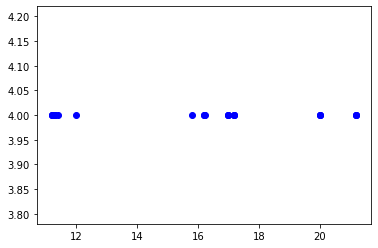

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


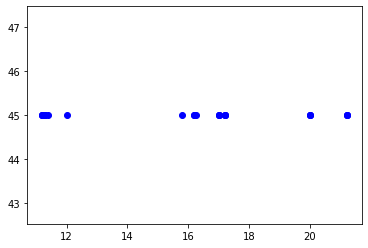

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.2792546652480345, nan, nan]


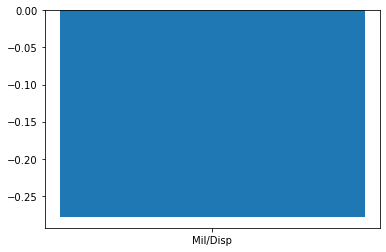


 Force
Mileage Correlation Displacement
R =  -1.0


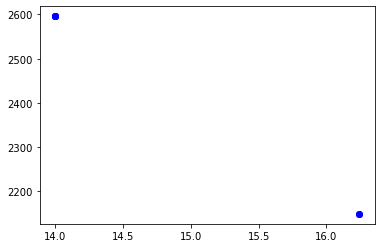

Mileage Correlation Valves_Per_Cylinder
R =  nan


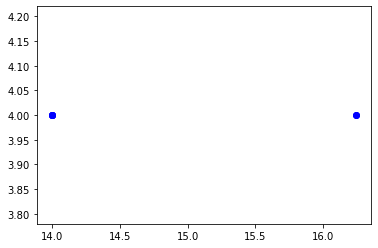

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


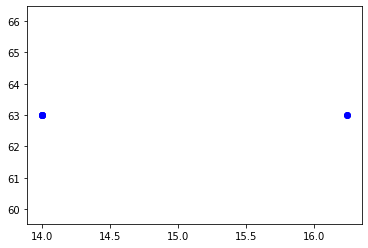

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-1.0, nan, nan]


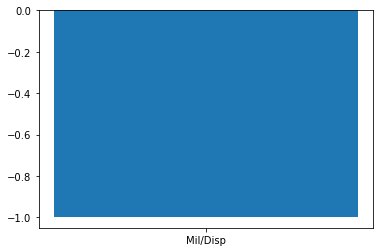


 Ford
Mileage Correlation Displacement
R =  -0.778827311465568


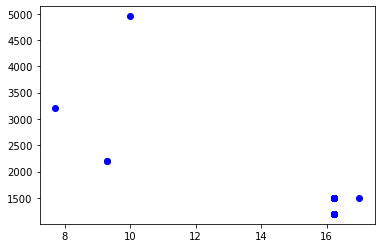

Mileage Correlation Valves_Per_Cylinder
R =  nan


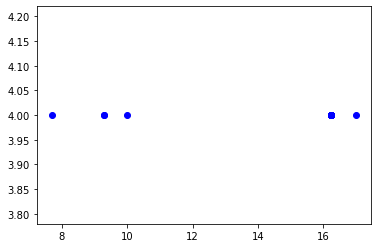

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.8675393070834975


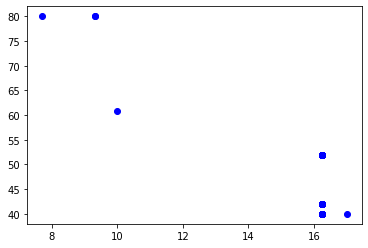

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.778827311465568, nan, -0.8675393070834975]


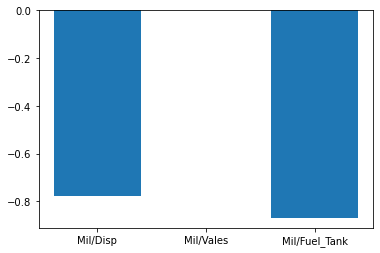


 Honda
Mileage Correlation Displacement
R =  0.17366605165318993


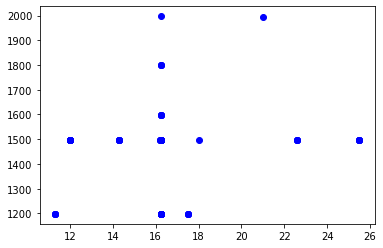

Mileage Correlation Valves_Per_Cylinder
R =  nan


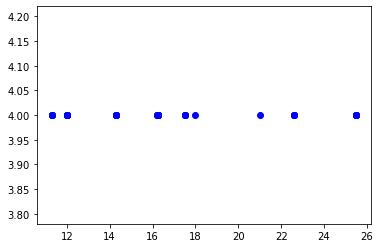

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.0342156368780069


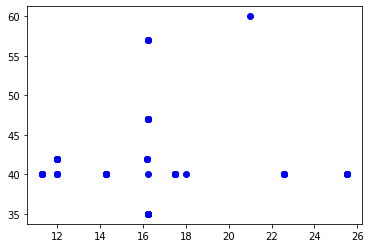

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.17366605165318993, nan, 0.0342156368780069]


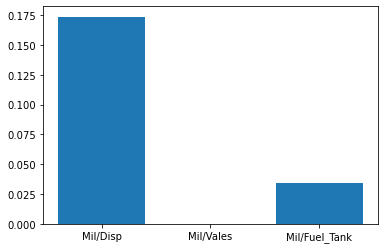


 Hyundai
Mileage Correlation Displacement
R =  -0.2744358205915236


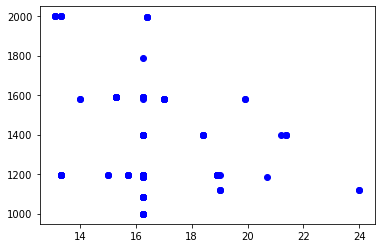

Mileage Correlation Valves_Per_Cylinder
R =  nan


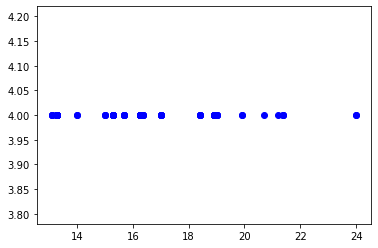

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.13929726002402854


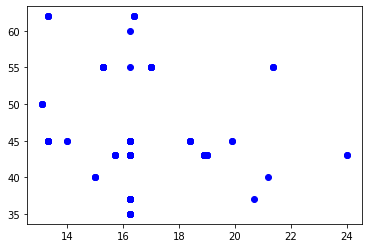

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.2744358205915236, nan, -0.13929726002402854]


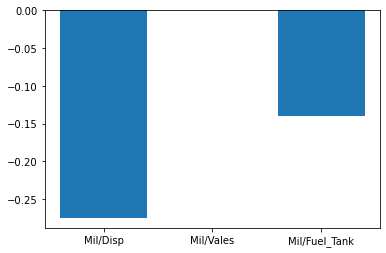


 Icml
Mileage Correlation Displacement
R =  nan


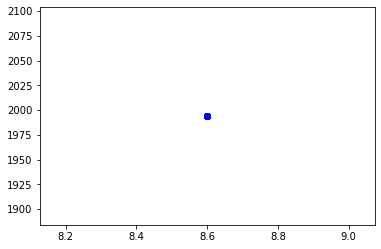

Mileage Correlation Valves_Per_Cylinder
R =  nan


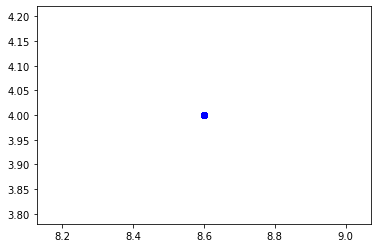

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


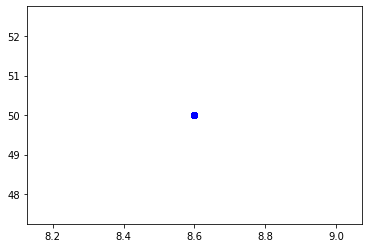

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[nan, nan, nan]


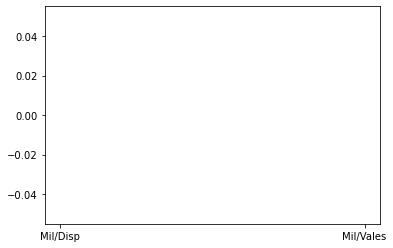


 Isuzu
Mileage Correlation Displacement
R =  0.8424103004570573


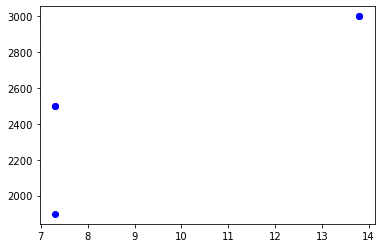

Mileage Correlation Valves_Per_Cylinder
R =  nan


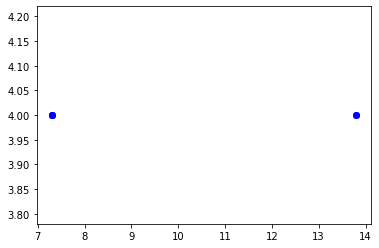

Mileage Correlation Fuel_Tank_Capacity_litre
R =  1.0


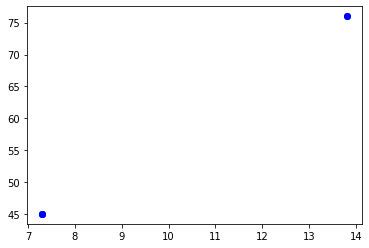

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.8424103004570573, nan, 1.0]


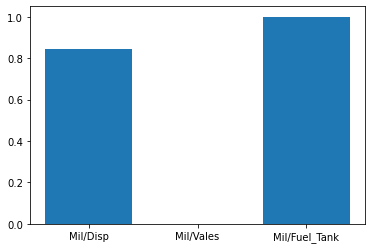


 Jaguar
Mileage Correlation Displacement
R =  -0.026232522654685664


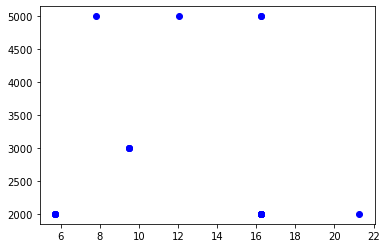

Mileage Correlation Valves_Per_Cylinder
R =  nan


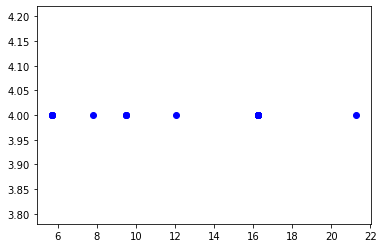

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.6068027015468818


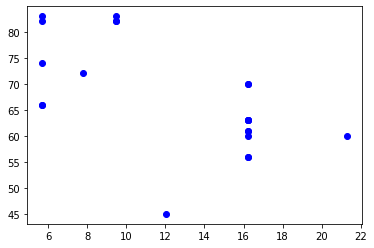

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.026232522654685664, nan, -0.6068027015468818]


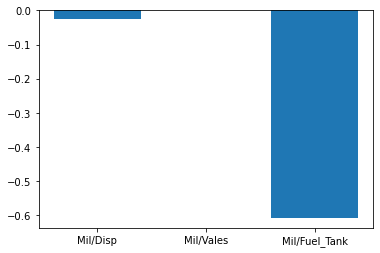


 Jeep
Mileage Correlation Displacement
R =  -0.6991676925260992


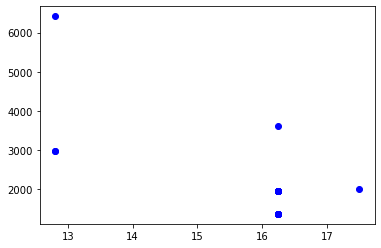

Mileage Correlation Valves_Per_Cylinder
R =  nan


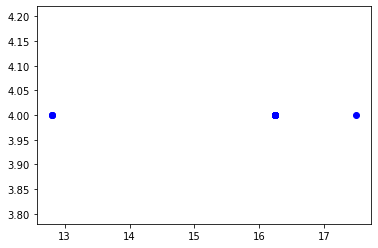

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.6930189138352348


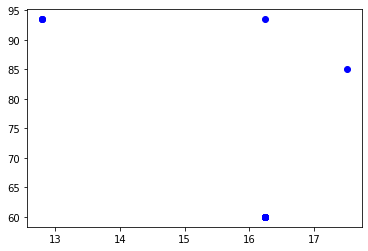

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.6991676925260992, nan, -0.6930189138352348]


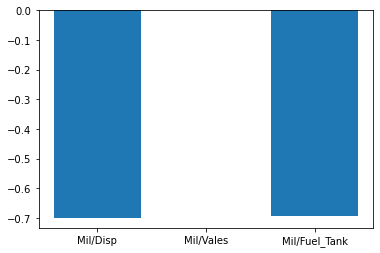


 Kia
Mileage Correlation Displacement
R =  2.7102718302761936e-16


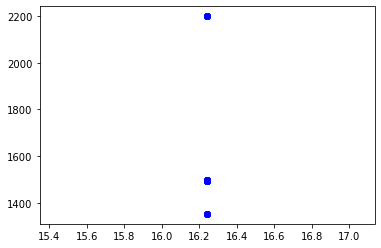

Mileage Correlation Valves_Per_Cylinder
R =  nan


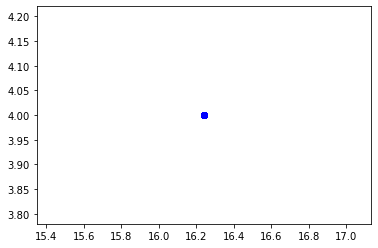

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -2.591082752763443e-16


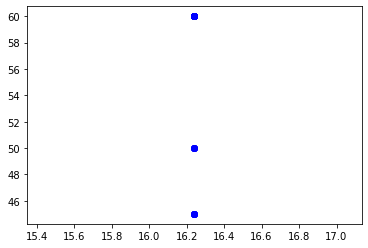

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[2.7102718302761936e-16, nan, -2.591082752763443e-16]


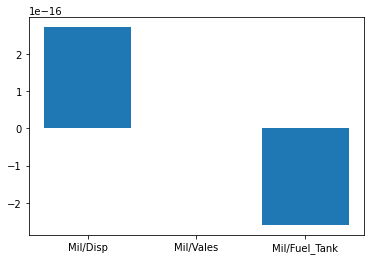


 Lamborghini
Mileage Correlation Displacement
R =  -0.7923580251079051


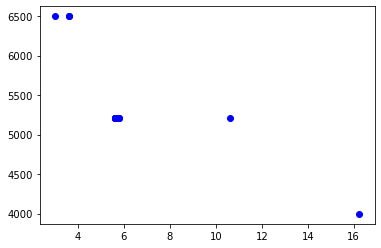

Mileage Correlation Valves_Per_Cylinder
R =  0.85344056600082


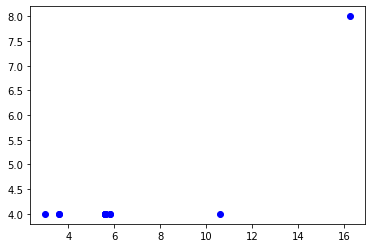

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.21604735306844944


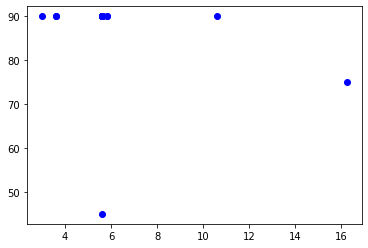

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.7923580251079051, 0.85344056600082, -0.21604735306844944]


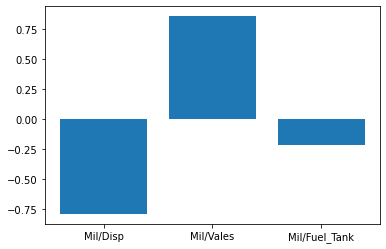


 Land Rover
Mileage Correlation Displacement
R =  nan


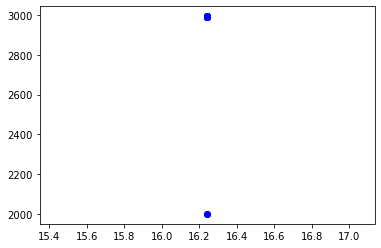

Mileage Correlation Valves_Per_Cylinder
R =  nan


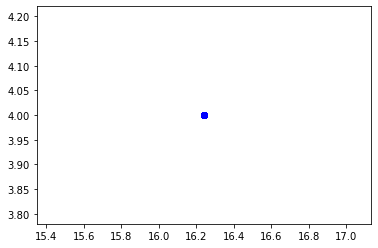

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


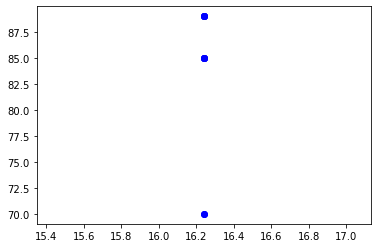

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[nan, nan, nan]


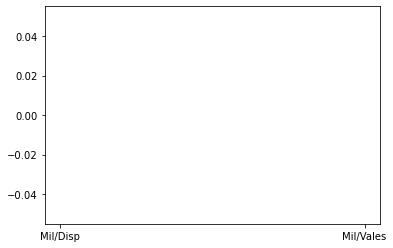


 Land Rover Rover
Mileage Correlation Displacement
R =  -0.5281310219490266


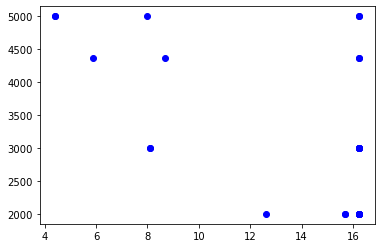

Mileage Correlation Valves_Per_Cylinder
R =  0.29124075262746607


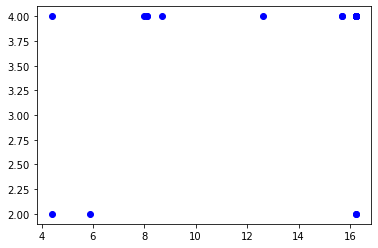

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.4565544906889488


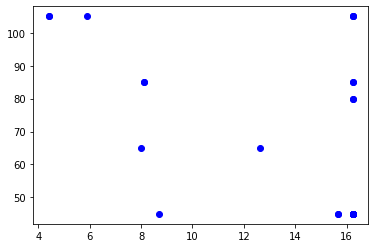

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.5281310219490266, 0.29124075262746607, -0.4565544906889488]


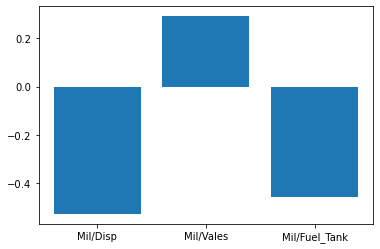


 Lexus
Mileage Correlation Displacement
R =  0.43327902008285435


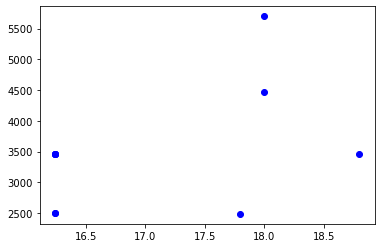

Mileage Correlation Valves_Per_Cylinder
R =  0.5150615712444748


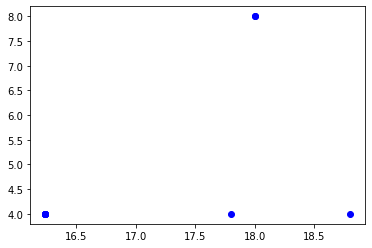

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.010727491579671424


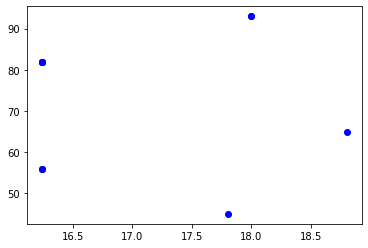

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.43327902008285435, 0.5150615712444748, 0.010727491579671424]


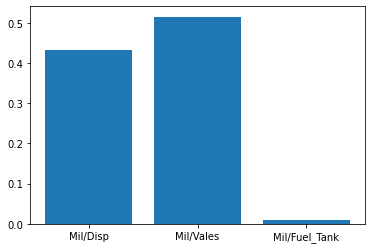


 Mahindra
Mileage Correlation Displacement
R =  -0.5164600798598723


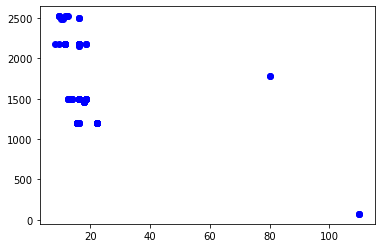

Mileage Correlation Valves_Per_Cylinder
R =  0.1448827902151058


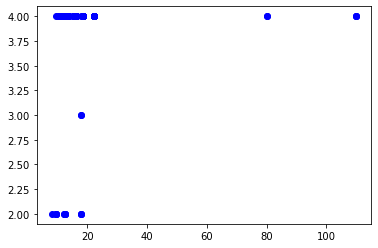

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.2162817323870727


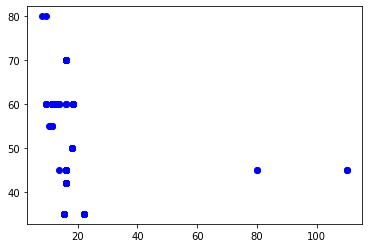

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.5164600798598723, 0.1448827902151058, -0.2162817323870727]


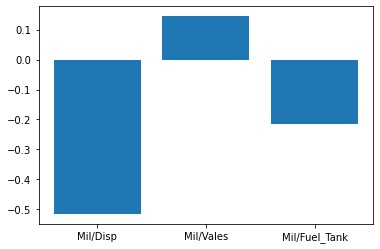


 Maruti Suzuki
Mileage Correlation Displacement
R =  0.06993772010398713


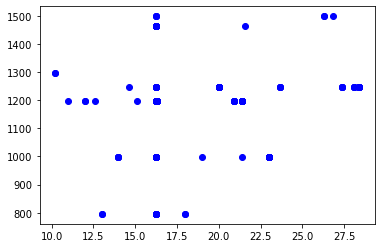

Mileage Correlation Valves_Per_Cylinder
R =  0.16341707038232048


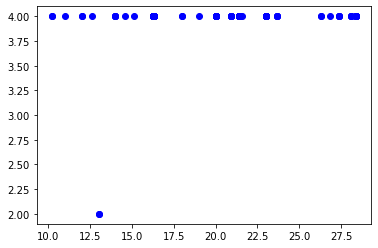

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.047864249338710044


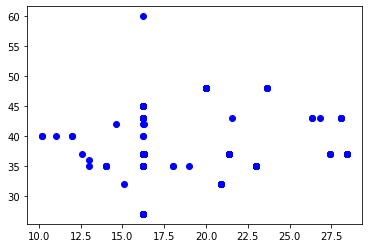

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.06993772010398713, 0.16341707038232048, 0.047864249338710044]


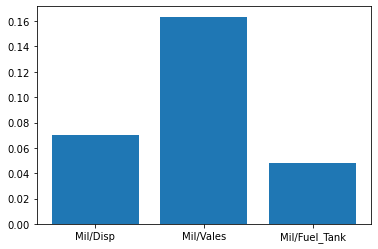


 Maruti Suzuki R
Mileage Correlation Displacement
R =  -6.596696116773098e-16


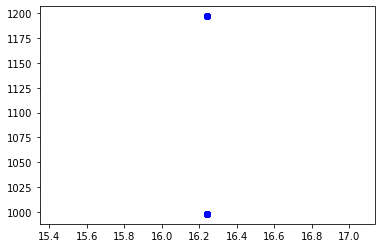

Mileage Correlation Valves_Per_Cylinder
R =  nan


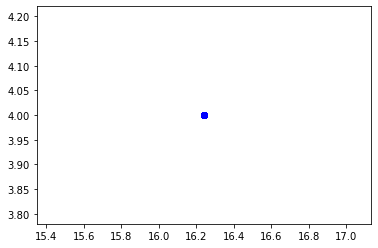

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


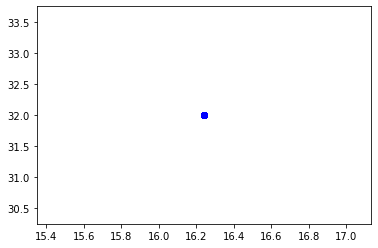

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-6.596696116773098e-16, nan, nan]


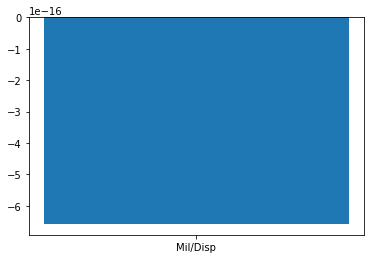


 Maserati
Mileage Correlation Displacement
R =  -0.43466547844297665


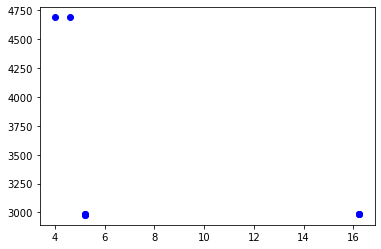

Mileage Correlation Valves_Per_Cylinder
R =  nan


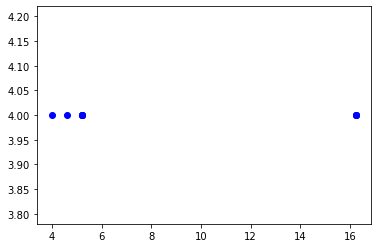

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.7028404882773999


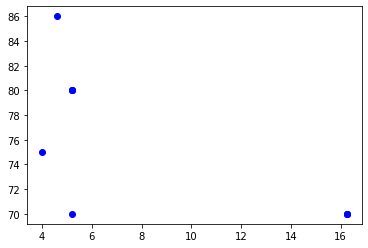

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.43466547844297665, nan, -0.7028404882773999]


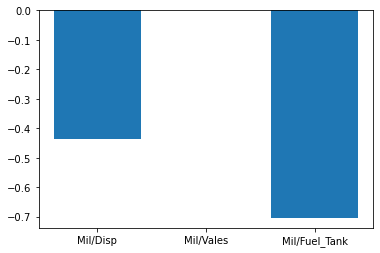


 Mg
Mileage Correlation Displacement
R =  2.337170672379344e-16


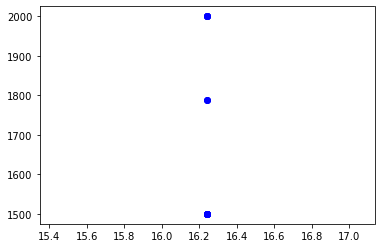

Mileage Correlation Valves_Per_Cylinder
R =  nan


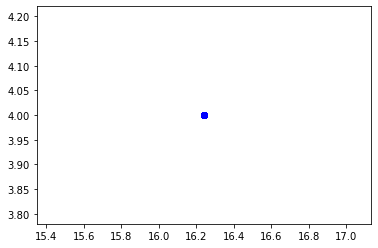

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


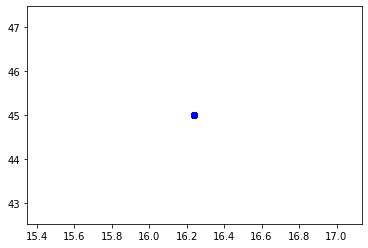

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[2.337170672379344e-16, nan, nan]


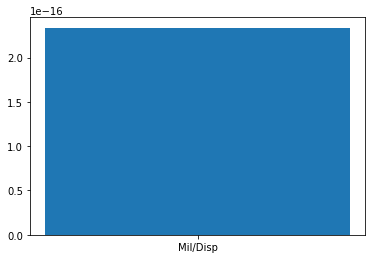


 Mini
Mileage Correlation Displacement
R =  0.48911799505855175


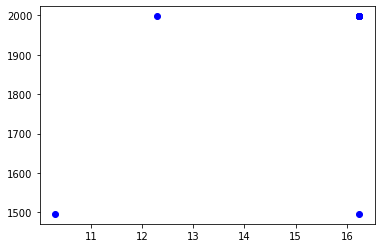

Mileage Correlation Valves_Per_Cylinder
R =  nan


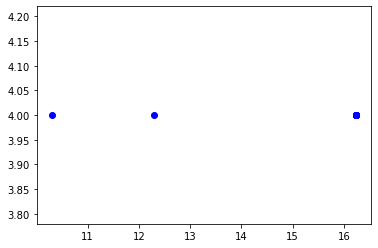

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.309988007444444


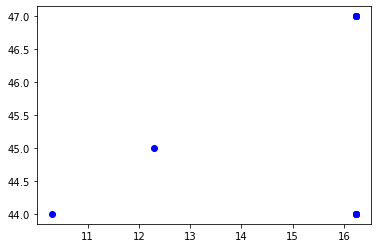

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.48911799505855175, nan, 0.309988007444444]


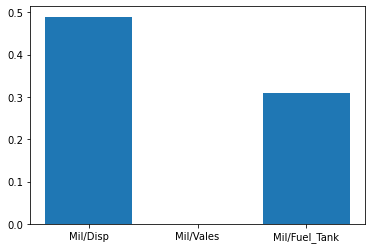


 Mitsubishi
Mileage Correlation Displacement
R =  -0.14051136475215809


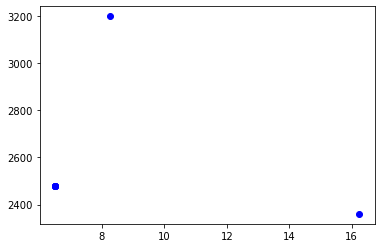

Mileage Correlation Valves_Per_Cylinder
R =  0.30887676372423084


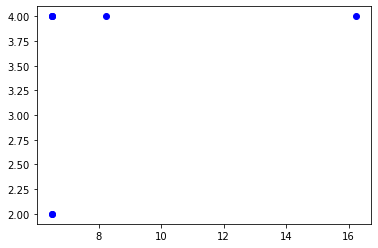

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.4363838324226509


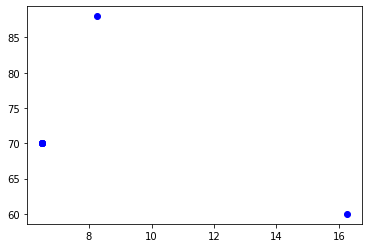

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.14051136475215809, 0.30887676372423084, -0.4363838324226509]


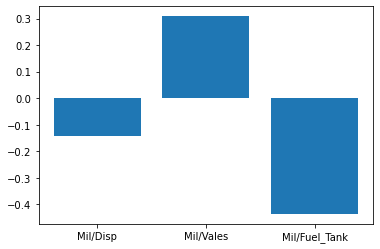


 Nissan
Mileage Correlation Displacement
R =  -0.5281799126241189


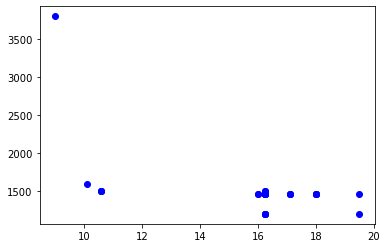

Mileage Correlation Valves_Per_Cylinder
R =  0.04752698735794476


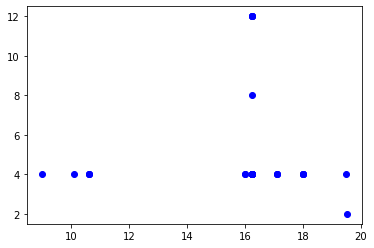

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.36248044549700603


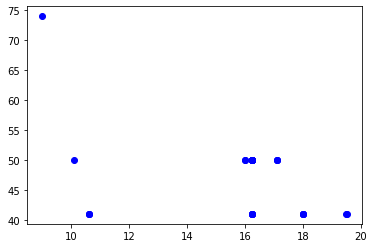

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.5281799126241189, 0.04752698735794476, -0.36248044549700603]


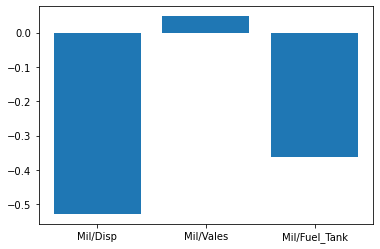


 Porsche
Mileage Correlation Displacement
R =  -0.22260764708747843


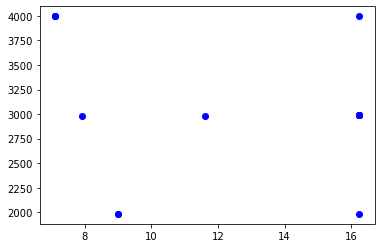

Mileage Correlation Valves_Per_Cylinder
R =  nan


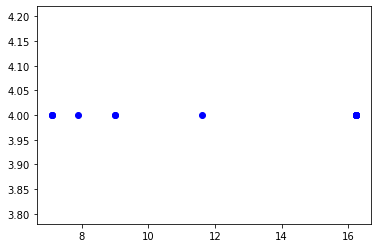

Mileage Correlation Fuel_Tank_Capacity_litre
R =  0.0004001885697490535


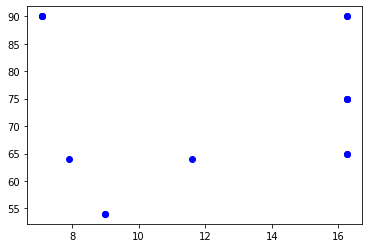

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.22260764708747843, nan, 0.0004001885697490535]


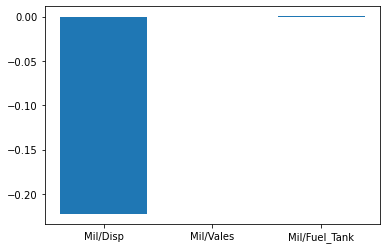


 Premier
Mileage Correlation Displacement
R =  -0.43504631566250446


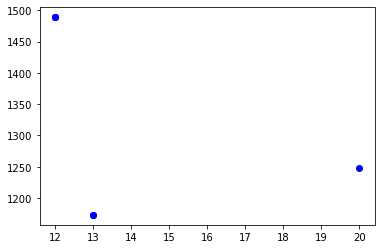

Mileage Correlation Valves_Per_Cylinder
R =  nan


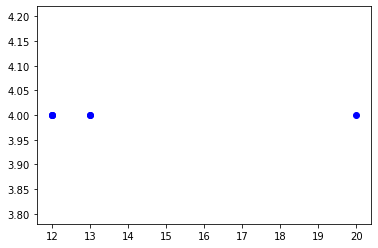

Mileage Correlation Fuel_Tank_Capacity_litre
R =  nan


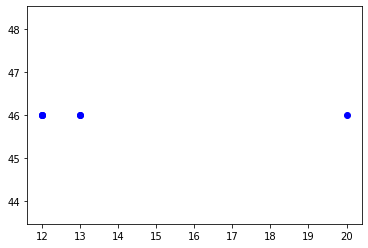

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.43504631566250446, nan, nan]


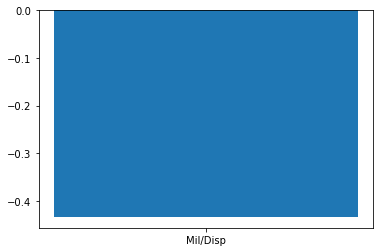


 Renault
Mileage Correlation Displacement
R =  -0.6645693588721753


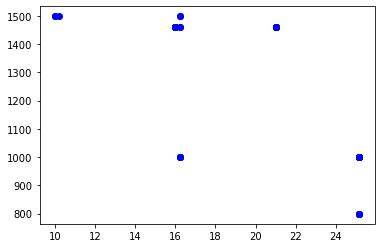

Mileage Correlation Valves_Per_Cylinder
R =  nan


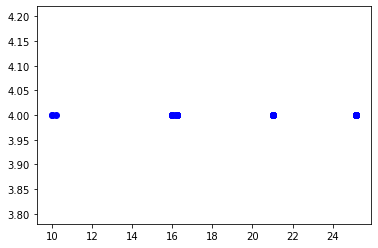

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.7705001775595707


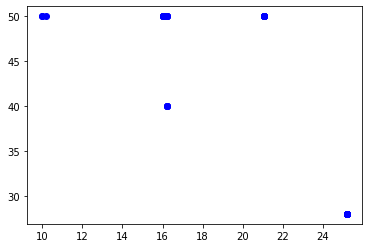

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.6645693588721753, nan, -0.7705001775595707]


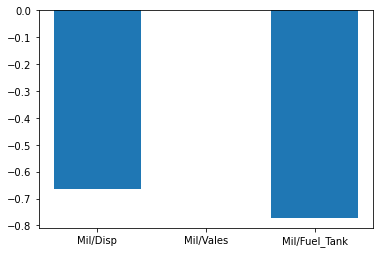


 Skoda
Mileage Correlation Displacement
R =  -0.030243219200948752


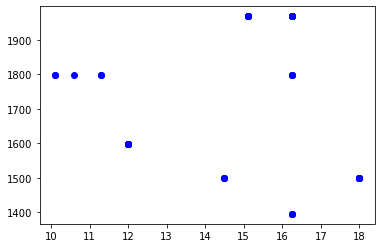

Mileage Correlation Valves_Per_Cylinder
R =  nan


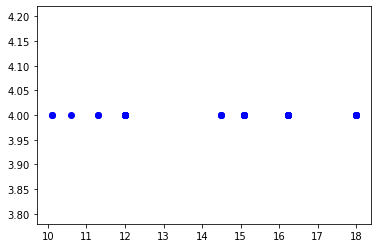

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.41613555740863506


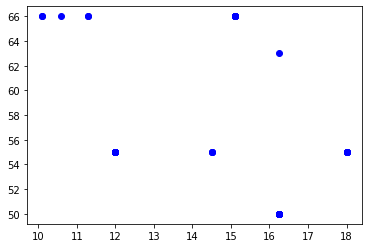

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.030243219200948752, nan, -0.41613555740863506]


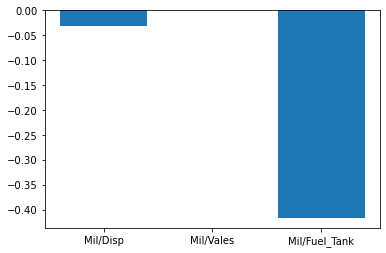


 Tata
Mileage Correlation Displacement
R =  -0.5930230381456969


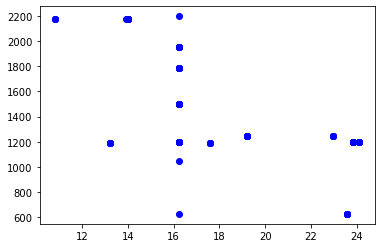

Mileage Correlation Valves_Per_Cylinder
R =  -0.3347952655234537


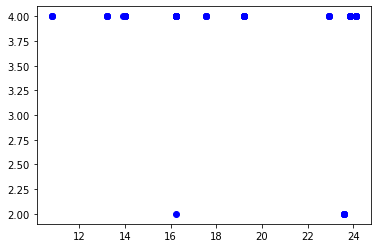

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.6166883894743577


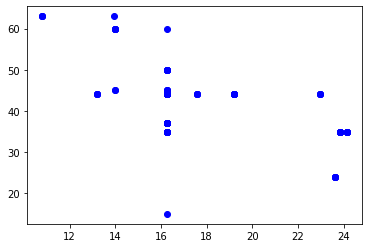

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.5930230381456969, -0.3347952655234537, -0.6166883894743577]


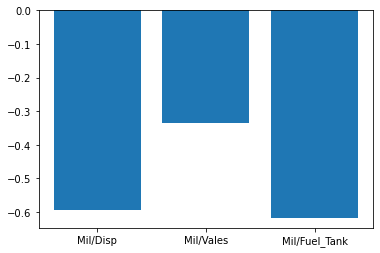


 Toyota
Mileage Correlation Displacement
R =  -0.7626659224225371


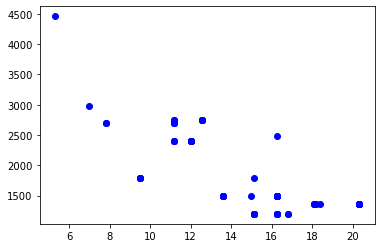

Mileage Correlation Valves_Per_Cylinder
R =  -0.6798779020738115


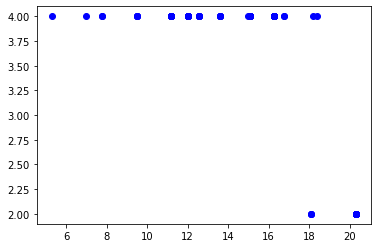

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.6933035293739009


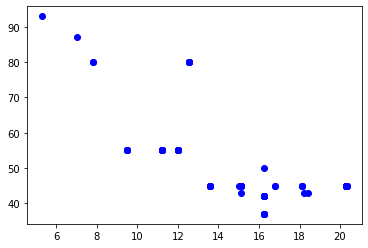

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.7626659224225371, -0.6798779020738115, -0.6933035293739009]


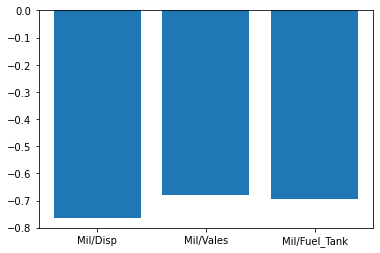


 Volkswagen
Mileage Correlation Displacement
R =  0.15950283221222564


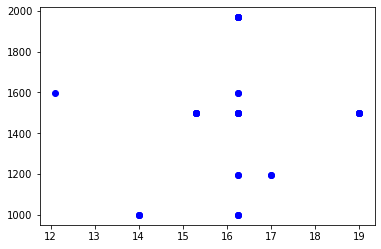

Mileage Correlation Valves_Per_Cylinder
R =  -0.001295346628459382


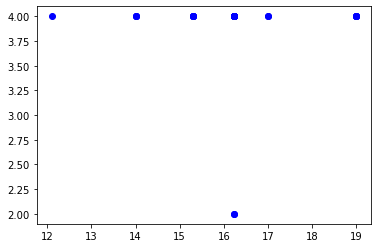

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.09992541684302302


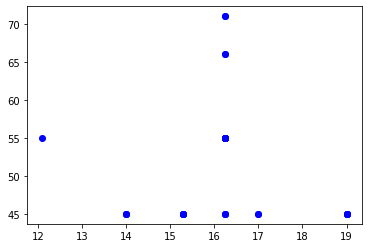

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.15950283221222564, -0.001295346628459382, -0.09992541684302302]


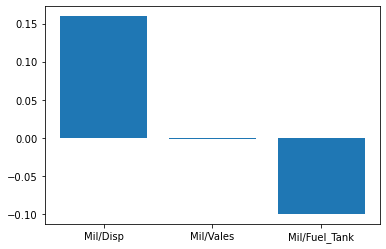


 Volvo
Mileage Correlation Displacement
R =  0.22726923431687454


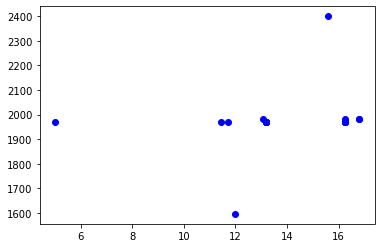

Mileage Correlation Valves_Per_Cylinder
R =  nan


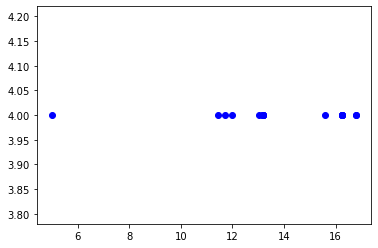

Mileage Correlation Fuel_Tank_Capacity_litre
R =  -0.21262217566014643


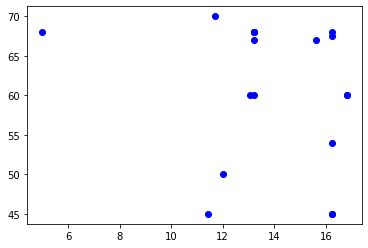

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[0.22726923431687454, nan, -0.21262217566014643]


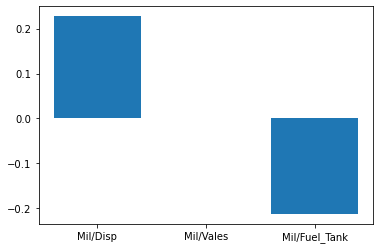

In [252]:

for x in df5:
    corre=[]
    print('\n',x)
    d1=df4.get_group(x)
#     print(d1)
    d1=d1.drop(['Make'],axis=1)
#     print(d1)
    for y in d1:
        if y!='City_Mileage_km_litre':
            print('Mileage Correlation',y)
            cor=d1['City_Mileage_km_litre'].corr(d1[y])
            print('R = ',cor)
            corre.append(cor)
            plt.scatter(d1['City_Mileage_km_litre'],d1[y],c='blue')
            plt.show()
        else:
            continue
    print('Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank')
    print(corre)
    plt.bar(['Mil/Disp','Mil/Vales','Mil/Fuel_Tank'],corre)
    plt.show()

In [253]:
df6=df[['City_Mileage_km_litre', 'Displacement', 'Valves_Per_Cylinder', 'Fuel_Tank_Capacity_litre']]


City_Mileage_km_litre correlation : Displacement
R -0.37585327463929924


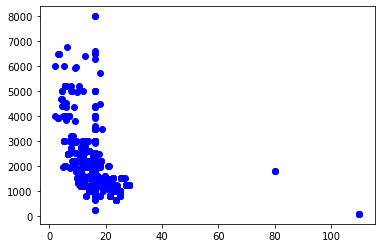

City_Mileage_km_litre correlation : Valves_Per_Cylinder
R 0.0037398640081256532


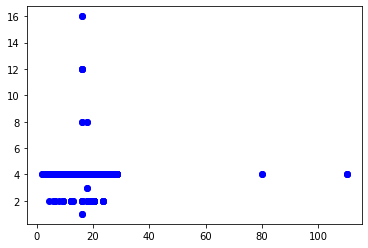

City_Mileage_km_litre correlation : Fuel_Tank_Capacity_litre
R -0.3416892623979557


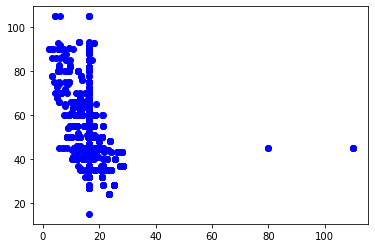

In [254]:
Corr1=[]
for a in df6:
    if a!='City_Mileage_km_litre':
        print('City_Mileage_km_litre correlation :',a)
        cor1=df6['City_Mileage_km_litre'].corr(df6[a])
        print('R',cor1)
        Corr1.append(cor1)
        plt.scatter(df6['City_Mileage_km_litre'],df6[a],c='blue')
        plt.show()

Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank
[-0.37585327463929924, 0.0037398640081256532, -0.3416892623979557]


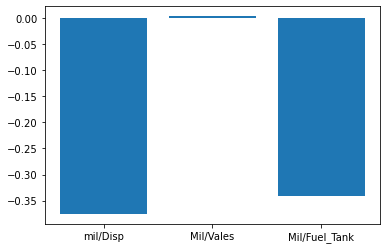

In [255]:
print('Mileage/Displacement ,Mileage/ValesPerCylinder, Mileage/Fuel_Tank')
print(Corr1)
plt.bar(['mil/Disp','Mil/Vales','Mil/Fuel_Tank'],Corr1)
plt.show()

City Mileage decreses with the increase in displacement and fuel tank capacity. 
City Mileage do not have relation with valves per cylinder. 